In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import librosa
import IPython.display as ipd

In [8]:
#load .wav sound file
#sr = sample rate = #sam[le per second, 22050 Hz
x, sr = librosa.load('violin-C4.wav')
print(type(x))
print('x length: {}'.format(len(x)))
print(type(sr))
print('sr = {}'.format(sr))

<class 'numpy.ndarray'>
x length: 77000
<class 'int'>
sr = 22050


In [9]:
# confirm the audio sample length
print('Sound clip is {} seconds long.'.format(len(x)/sr))

Sound clip is 3.492063492063492 seconds long.


Text(0, 0.5, 'Pressure')

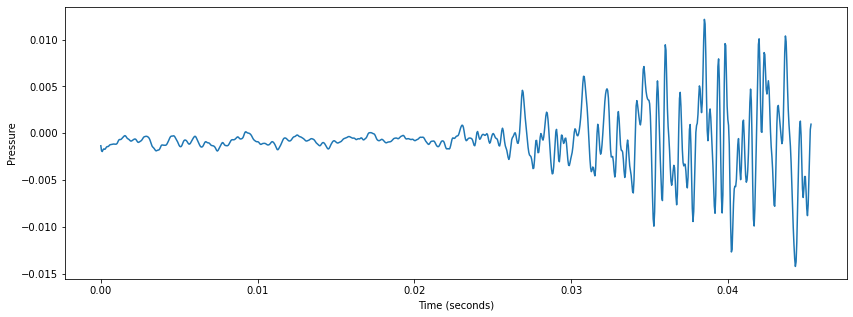

In [15]:
plt.figure(figsize=(20,5))
# Develop array 't to match x
t = np.array(range(0, len(x)))/sr
#plt.plot(t,x)
plt.plot(t[0:1000],x[0:1000])
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure')